<a href="https://colab.research.google.com/github/nguyen1oc/Study_Libaries/blob/main/tf_computervision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow.keras.backend as K


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import random

In [ ]:
print(f"Tensorflow version: {tf.__version__}")
print(f"Keras version: {keras.__version__}")

Tensorflow version: 2.18.0
Keras version: 3.8.0


#1. LOAD DATA

Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.

https://www.tensorflow.org/datasets/catalog/fashion_mnist

In [ ]:
K.clear_session()

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [ ]:
type(x_train),
type(x_test)

numpy.ndarray

In [ ]:
x_train.shape, y_train.shape


((60000, 28, 28), (60000,))

In [ ]:
x_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [ ]:
x_train.dtype

dtype('uint8')

In [ ]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 155, 236, 207, 178, 107, 156, 161, 109,  64,  23,  77, 130,
         72,  15],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
         69, 207, 223, 218, 216, 216, 163, 127, 121, 122, 146, 141,  88,
        172,  66],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   1,   0,
        200, 232, 232, 233, 229, 223, 223, 215, 213, 164, 127, 123, 196,
        229,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        183, 225, 216, 223, 228, 235, 227, 224, 222, 224, 221, 223, 245,
        173,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        193, 228, 218, 213, 198, 180, 212, 210, 211, 213, 223, 220, 243,
        202,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   3,   0,  12,
        219, 220, 212, 218, 192, 169, 227, 208, 218, 224, 212, 226, 197,
        209,  52],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0,  99,
        244, 222, 220, 218, 203, 198, 221, 215, 213, 222, 220, 245, 119,
        167,  56],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   4,   0,   0,  55,
        236, 228, 230, 228, 240, 232, 213, 218, 223, 234, 217, 217, 209,
         92,   0],
       [  0,   0,   1,   4,   6,   7,   2,   0,   0,   0,   0,   0, 237,
        226, 217, 223, 222, 219, 222, 221, 216, 223, 229, 215, 218, 255,
         77,   0],
       [  0,   3,   0,   0,   0,   0,   0,   0,   0,  62, 145, 204, 228,
        207, 213, 221, 218, 208, 211, 218, 224, 223, 219, 215, 224, 244,
        159,   0],
       [  0,   0,   0,   0,  18,  44,  82, 107, 189, 228, 220, 222, 217,
        226, 200, 205, 211, 230, 224, 234, 176, 188, 250, 248, 233, 238,
        215,   0],
       [  0,  57, 187, 208, 224, 221, 224, 208, 204, 214, 208, 209, 200,
        159, 245, 193, 206, 223, 255, 255, 221, 234, 221, 211, 220, 232,
        246,   0],
       [  3, 202, 228, 224, 221, 211, 211, 214, 205, 205, 205, 220, 240,
         80, 150, 255, 229, 221, 188, 154, 191, 210, 204, 209, 222, 228,
        225,   0],
       [ 98, 233, 198, 210, 222, 229, 229, 234, 249, 220, 194, 215, 217,
        241,  65,  73, 106, 117, 168, 219, 221, 215, 217, 223, 223, 224,
        229,  29],
       [ 75, 204, 212, 204, 193, 205, 211, 225, 216, 185, 197, 206, 198,
        213, 240, 195, 227, 245, 239, 223, 218, 212, 209, 222, 220, 221,
        230,  67],
       [ 48, 203, 183, 194, 213, 197, 185, 190, 194, 192, 202, 214, 219,
        221, 220, 236, 225, 216, 199, 206, 186, 181, 177, 172, 181, 205,
        206, 115],
       [  0, 122, 219, 193, 179, 171, 183, 196, 204, 210, 213, 207, 211,
        210, 200, 196, 194, 191, 195, 191, 198, 192, 176, 156, 167, 177,
        210,  92],
       [  0,   0,  74, 189, 212, 191, 175, 172, 175, 181, 185, 188, 189,
        188, 193, 198, 204, 209, 210, 210, 211, 188, 188, 194, 192, 216,
        170,   0],
       [  2,   0,   0,   0,  66, 200, 22

In [ ]:
y_train[0]

9

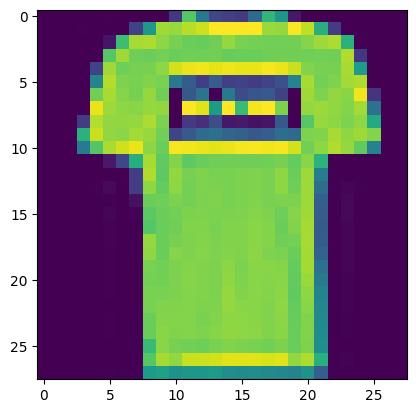

In [ ]:
plt.imshow(x_train[1])

In [ ]:
class_names = ["t-shirt", "trouser", "pullover", "dress", "coat", "sandal", "shirt", "sneaker", "bag", "ankle boot"]
class_number = len(class_names)

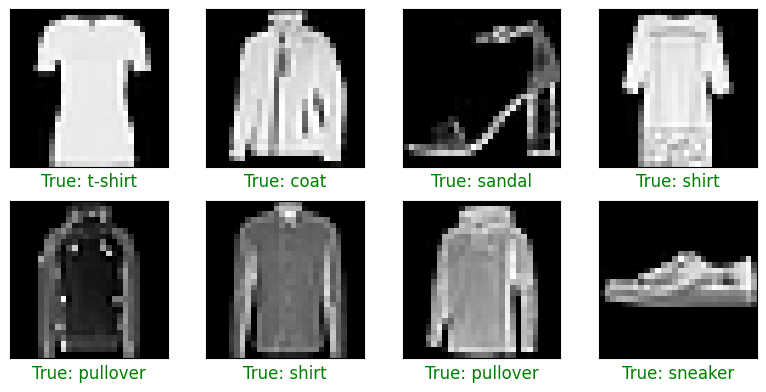

In [ ]:
def print_data(x_data: np.ndarray, y_data: np.ndarray) -> None:
    nrow, ncol = 2,4
    fig, axes = plt.subplots(nrow, ncol, figsize=(8,4))
    len_x = x_data.shape[0]
    for idx in range(nrow*ncol):
      ax = axes[idx//ncol, idx % ncol]
      img_idx = random.randint(0 , len_x)
      ax.imshow(x_data[img_idx], cmap = 'gray')
      ax.set(xticks=[], yticks=[])

      true_label = f"True: {class_names[y_data[img_idx]]}"
      ax.set_xlabel(true_label, color = "green", fontsize = 12)
    plt.tight_layout()
    plt.show()

print_data(x_train, y_train)

#2. PRE-PROCESSING

Convert to float32 & Scale images to the [0,1] range for training

In [ ]:
x_train = x_train.astype(np.float32)/255
x_test = x_test.astype(np.float32)/255

Expand the dimension of array so they have (60000,28,28,1) - gray scale

In [ ]:

x_train.shape


(60000, 28, 28)

In [ ]:
x_test = np.expand_dims(x_test, axis = -1)
x_test.shape


(10000, 28, 28, 1)

In [ ]:
y_train_label = keras.utils.to_categorical(y_train, class_number)
y_test_label = keras.utils.to_categorical(y_test, class_number)

In [ ]:
y_train[0]

9

In [ ]:
 y_test_label[0],

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),)

#3. ANN ARCHITECTURE

In [ ]:
input_shape = (28,28,1)

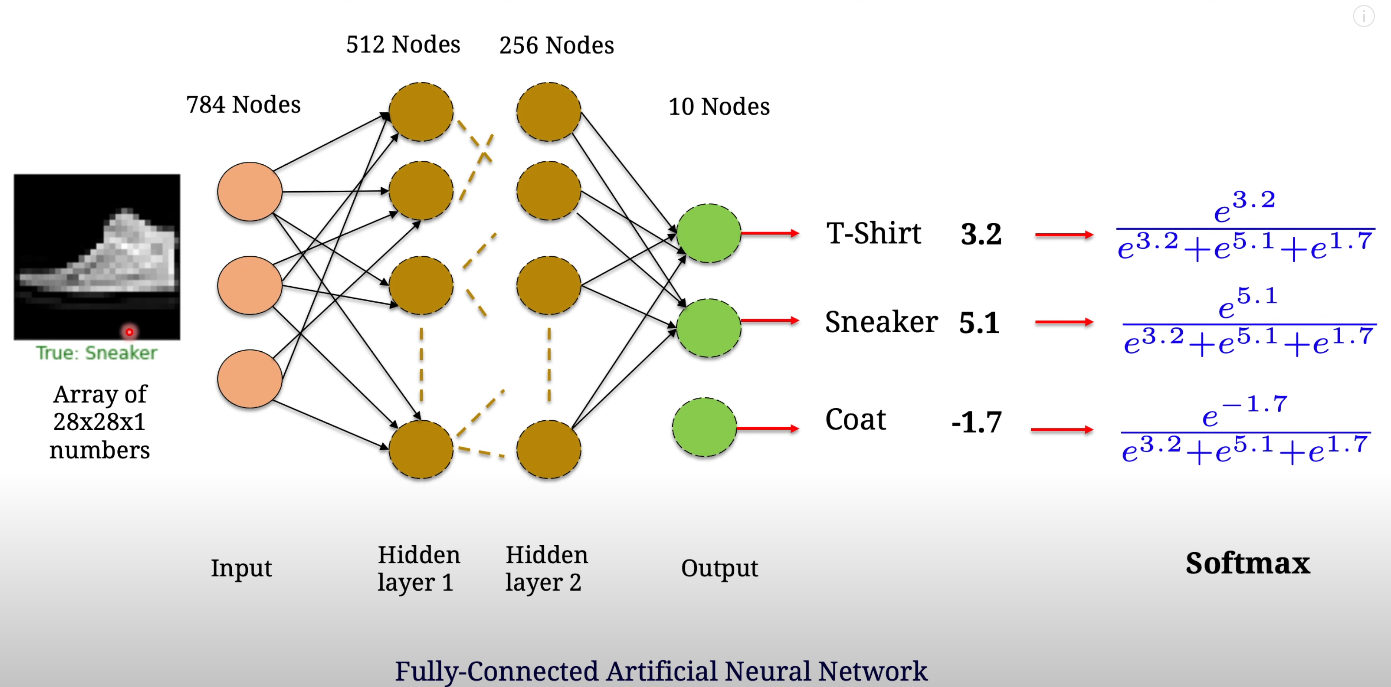

In [ ]:
model = keras.models.Sequential([
    layers.Flatten(input_shape = input_shape),
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    #layers.Dense(128, activation='relu'),
    layers.Dense(class_number, activation='softmax'),
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 535,818 (2.04 MB)

 Trainable params: 535,818 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

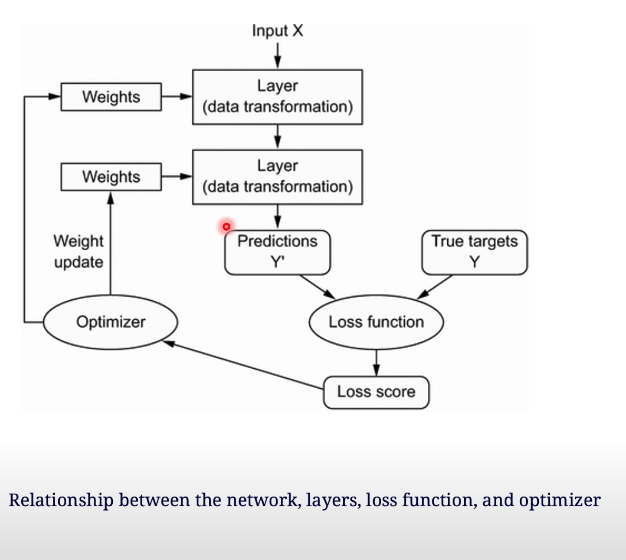

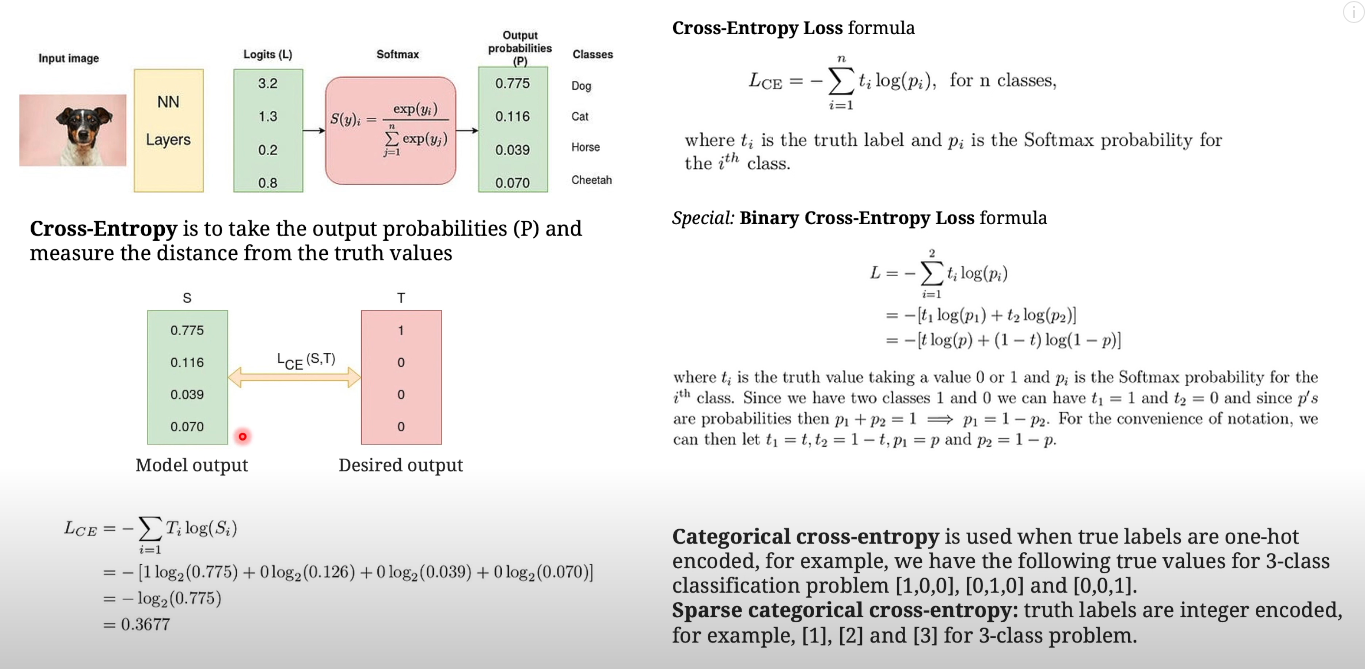

In [ ]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train_label, epochs = 10, batch_size = 256, validation_split = 0.1)

Epoch 1/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - accuracy: 0.6874 - loss: 0.8753 - val_accuracy: 0.8265 - val_loss: 0.4867
Epoch 2/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.8363 - loss: 0.4357 - val_accuracy: 0.8435 - val_loss: 0.4138
Epoch 3/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - accuracy: 0.8636 - loss: 0.3690 - val_accuracy: 0.8705 - val_loss: 0.3534
Epoch 4/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.8751 - loss: 0.3343 - val_accuracy: 0.8797 - val_loss: 0.3363
Epoch 5/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.8839 - loss: 0.3091 - val_accuracy: 0.8675 - val_loss: 0.3494
Epoch 6/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - accuracy: 0.8910 - loss: 0.2907 - val_accuracy: 0.8708 - val_loss: 0.3544
Epoch 7/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.8950 - loss: 0.2791 - val_accuracy: 0.8882 - val_loss: 0.3257
Epoch 8/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - accuracy: 0.9015 - loss: 0.2606 - val_accu

In [ ]:
history_dict = history.history

In [ ]:
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [ ]:
train_loss, val_loss = history_dict['loss'], history_dict['val_loss']
train_accuracy, val_accuracy = history_dict['accuracy'], history_dict['val_accuracy']

[Text(0.5, 1.0, 'Accuracy between training and validation'),
 Text(0.5, 0, 'epochs'),
 Text(0, 0.5, 'accuracy')]

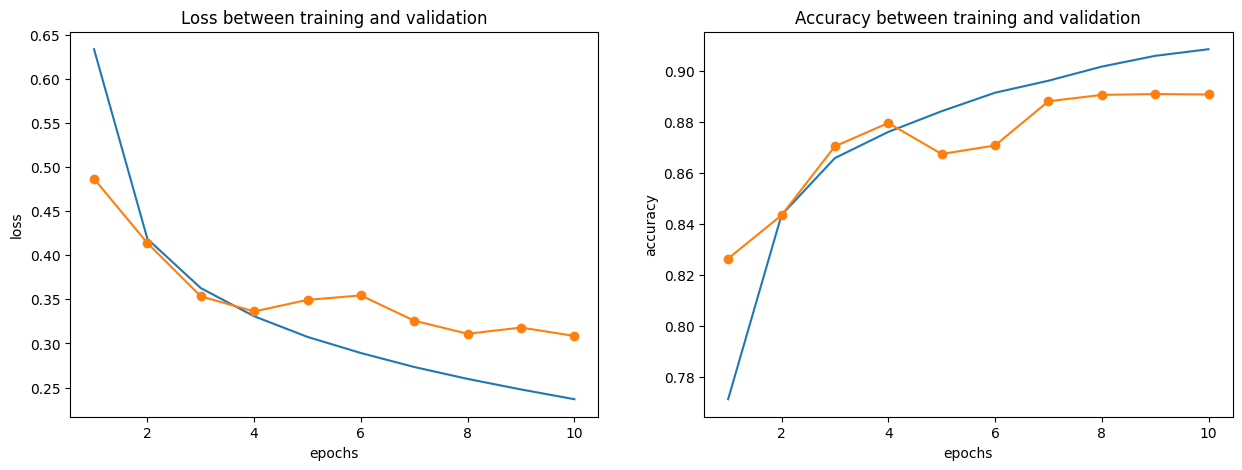

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
epoch_run = [i+1 for i in range(10)]

ax1.axis
ax1.plot(epoch_run, train_loss, label='Training Loss')
ax1.plot(epoch_run, val_loss, label='Validation Loss', marker='o')
title1 = "Loss between training and validation"
ax1.set(title = title1, xlabel = 'epochs', ylabel = 'loss')

ax2.axis
ax2.plot(epoch_run, train_accuracy, label='Training Acccuracy')
ax2.plot(epoch_run, val_accuracy, label='Validation Accuracy', marker='o')
title2 = "Accuracy between training and validation"
ax2.set(title = title2, xlabel = 'epochs', ylabel = 'accuracy')

#4. MODEL EVALUATON

In [ ]:
print(f"x_test shape: {x_test.shape}")
print(f"y_test_label shape: {y_test_label.shape}")


x_test shape: (10000, 28, 28, 1)
y_test_label shape: (10000, 10)


In [ ]:
y_test_label = np.array(y_test_label, dtype=np.float32)

In [ ]:
print(f"x_test dtype: {x_test.dtype}")
print(f"y_test_label dtype: {y_test_label.dtype}")

x_test dtype: float32
y_test_label dtype: float32


In [ ]:
print(model.loss)

categorical_crossentropy


In [ ]:
print("Model input shape:", model.input_shape)
print("x_test shape:", x_test.shape)


Model input shape: (None, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)


In [ ]:
sample_prediction = model.predict(x_test[:1])  # Thử dự đoán một mẫu
print("Prediction shape:", sample_prediction.shape)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
Prediction shape: (1, 10)


In [ ]:
x_test.shape

(10000, 28, 28, 1)

In [329]:
score = model.evaluate(x_test[:10], y_test_label[:10])

ValueError: Exception encountered when calling Sequential.call().

[1mCannot take the length of shape with unknown rank.[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=<unknown>, dtype=float32)
  • training=False
  • mask=None

In [ ]:
print(f"Test loss: {score[0]:.4f}")
print(f"Test Accuracy: {score[1]:.4f}")


Test loss: 0.4057
Test Accuracy: 0.8576


#5. PREDICTION

In [ ]:
x_sample = x_test[:3]
y_proba = model.predict(x_sample)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


In [ ]:
y_proba.round(3)

array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.001, 0.   , 0.047, 0.   ,
        0.951],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ]], dtype=float32)

In [ ]:
predictions = np.argmax(y_proba, axis = 1)
predictions

array([9, 2, 1])

In [ ]:
[class_names[pred] for pred in predictions]

['ankle boot', 'pullover', 'trouser']

In [ ]:
from typing import Optional
def predict(x_data: np.ndarray, y_data: np.ndarray, y_proba: Optional[np.ndarray] = None) -> None:
    nrow, ncol = 2,4
    fig, axes = plt.subplots(nrow, ncol, figsize=(8,4))
    len_x = x_data.shape[0]
    for idx in range(nrow*ncol):
      ax = axes[idx//ncol, idx % ncol]
      img_idx = random.randint(0 , len_x)
      ax.imshow(x_data[img_idx], cmap = 'gray')
      ax.set(xticks=[], yticks=[])
      color = 'green'
      true_label = f"True: {class_names[y_data[img_idx]]}"

      if y_proba is not None:
        predicted_idx = np.argmax(y_proba[img_idx])
        prediction_label = class_names[predicted_idx]
        color = 'red' if predicted_idx != y_data[img_idx] else color
        predicted_label_str = f"\nPredicted: {prediction_label}"

      img_tit1 = true_label if y_proba is None else true_label + predicted_label_str
      ax.set_xlabel(true_label, color = color, fontsize = 12)
    plt.tight_layout()
    plt.show()


In [ ]:
y_proba = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


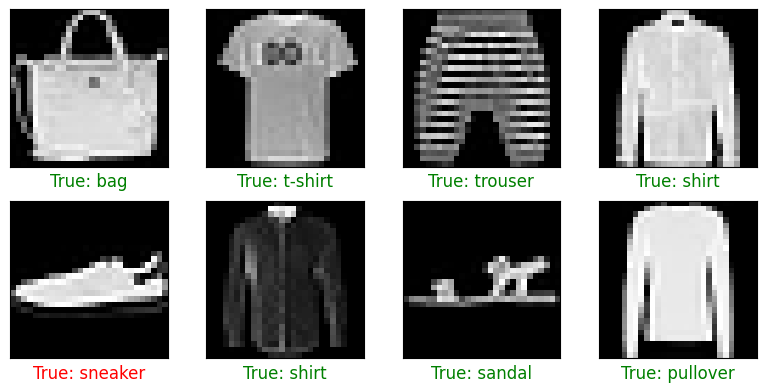

In [ ]:
predict(x_test, y_test, y_proba)